#### PAIR PROGRAMMING - REGRESIÓN LOGÍSTICA - RANDOM FOREST

In [4]:
!pip install tqdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 5.4 MB/s eta 0:00:00


In [1]:
# Tratamiento de datos
# ------------------------------------------------------------------------------
import numpy as np
import pandas as pd
from tqdm import tqdm

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Modelado y evaluación
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score , cohen_kappa_score, roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV

# Configuración warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

Hasta ahora hemos ajustado el modelo usando una Regresión Logística, pero como hemos aprendido, podemos usar el Random Forest en este tipo de problemas. Los objetivos de este pair programming :

- Ajustad un modelo de Random Forest a nuestros datos.


In [2]:
df = pd.read_pickle('../datos/df_estan_cod.pkl')
df.head()

,satisfaction,gender,customer_type,age,type_of_travel,class,flight_distance,seat_comfort,departure/arrival_time_convenient,gate_location,...,inflight_entertainment,online_support,ease_of_online_booking,on-board_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,departure_delay_in_minutes
0,0,0,1,1.041667,0,2,-1.400844,0,0,2,...,2,3,3,4,0,3,1,4,4,0.000000
1,0,1,1,0.291667,0,1,0.454852,0,0,4,...,3,3,3,2,1,2,3,4,4,25.833333
2,0,0,1,-1.041667,0,2,0.179747,0,0,4,...,0,3,3,4,2,2,2,2,4,0.000000
3,0,0,1,0.833333,0,2,-1.098734,0,0,4,...,2,3,3,3,0,0,2,3,2,0.000000
4,0,0,1,1.250000,0,2,-1.325738,0,0,4,...,3,2,3,3,0,0,2,3,1,0.000000


In [3]:
X1 = df.drop("satisfaction", axis = 1)
y1 = df["satisfaction"]

In [4]:
# dividimos nuestros datos en train y test para poder evaluar cómo de bueno es nuestro modelo

x_train, x_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.2, random_state = 42)

In [5]:
# lo primero que tenemos que hacer es definir un diccionario con los hiperparámetros que queremos modificar y los valores que queremos
# retomaremos aquellos usados en el modelo de Decission Tree II para intentar mejorar las métricas

param1 = {"max_depth": [7,10,15], # teniendo en cuenta que teníamos overfitting tendremos que reducir la profundidad del modelo, la nuestra anterior era de 17. Bajaremos mucho este valor ya que teníamos un overfitting muy claro
        "max_features": [1,2,3,4],# calculamos en celdas anteriores, probaremos a hacer el modelo como una variable, 2, 3 y 4. Ponemos como límite el 4 ya que es el resultado de la raiz cuadrada. 
        # estos dos hiperparámetros son más difíciles de definir, pero usualmente se suelen elegir los siguientes valores
        "min_samples_split": [5, 10, 15],
        "min_samples_leaf": [5, 10, 15]}

In [6]:
gs_rf = GridSearchCV(
            estimator=RandomForestClassifier(random_state=42), # tipo de modelo que queremos hacer
            param_grid= param1, # que hiperparámetros queremos que testee
            cv=10, # crossvalidation que aprendimos en la lección de regresión lineal intro. 
            verbose=-1) # para que no nos printee ningún mensaje en pantalla
        

In [7]:
gs_rf.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [7, 10, 15], 'max_features': [1, 2, 3, 4],
                         'min_samples_leaf': [5, 10, 15],
                         'min_samples_split': [5, 10, 15]},
             verbose=-1)

In [8]:
bosque = gs_rf.best_estimator_
bosque

RandomForestClassifier(max_depth=15, max_features=4, min_samples_leaf=5,
                       min_samples_split=5, random_state=42)

In [9]:
y_pred_test_rf = bosque.predict(x_test)
y_pred_train_rf = bosque.predict(x_train)

- Calculad las métricas a nuestro nuevo modelo.


In [5]:
def metricas(clases_reales_test, clases_predichas_test, clases_reales_train, clases_predichas_train, modelo):
    
    # para el test
    accuracy_test = accuracy_score(clases_reales_test, clases_predichas_test)
    precision_test = precision_score(clases_reales_test, clases_predichas_test)
    recall_test = recall_score(clases_reales_test, clases_predichas_test)
    f1_test = f1_score(clases_reales_test, clases_predichas_test)
    kappa_test = cohen_kappa_score(clases_reales_test, clases_predichas_test)

    # para el train
    accuracy_train = accuracy_score(clases_reales_train, clases_predichas_train)
    precision_train = precision_score(clases_reales_train, clases_predichas_train)
    recall_train = recall_score(clases_reales_train, clases_predichas_train)
    f1_train = f1_score(clases_reales_train, clases_predichas_train)
    kappa_train = cohen_kappa_score(clases_reales_train, clases_predichas_train)
    

    
    df = pd.DataFrame({"accuracy": [accuracy_test, accuracy_train], 
                       "precision": [precision_test, precision_train],
                       "recall": [recall_test, recall_train], 
                       "f1": [f1_test, f1_train],
                       "kapppa": [kappa_test, kappa_train],
                       "set": ["test", "train"]})
    
    df["modelo"] = modelo
    return df

In [11]:
df_resultados = metricas(y_test, y_pred_test_rf,y_train,  y_pred_train_rf, "Random Forest")
df_resultados

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.949954,0.942280,0.946638,0.944454,0.898917,test,Random Forest
1,0.960925,0.954007,0.960121,0.957054,0.921211,train,Random Forest


- Intentamos mejorar las métricas una última vez y para ello vamos a modificar de nuevo los hiperparámetros

In [6]:

param2 = {"max_depth": [12, 13, 14,15], # teniendo en cuenta que teníamos overfitting tendremos que reducir la profundidad del modelo, la nuestra anterior era de 17. Bajaremos mucho este valor ya que teníamos un overfitting muy claro
        "max_features": [1,2,3,4],# calculamos en celdas anteriores, probaremos a hacer el modelo como una variable, 2, 3 y 4. Ponemos como límite el 4 ya que es el resultado de la raiz cuadrada. 
        # estos dos hiperparámetros son más difíciles de definir, pero usualmente se suelen elegir los siguientes valores
        "min_samples_split": [5, 7, 10],
        "min_samples_leaf": [5, 7, 10]}

In [7]:
gs_rf2 = GridSearchCV(
            estimator=RandomForestClassifier(random_state=42), # tipo de modelo que queremos hacer
            param_grid= param2, # que hiperparámetros queremos que testee
            cv=10, # crossvalidation que aprendimos en la lección de regresión lineal intro. 
            verbose=-1) # para que no nos printee ningún mensaje en pantalla

In [8]:
gs_rf2.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [12, 13, 14, 15],
                         'max_features': [1, 2, 3, 4],
                         'min_samples_leaf': [5, 7, 10],
                         'min_samples_split': [5, 7, 10]},
             verbose=-1)

In [9]:
bosque2 = gs_rf2.best_estimator_
bosque2

RandomForestClassifier(max_depth=15, max_features=4, min_samples_leaf=5,
                       min_samples_split=5, random_state=42)

In [11]:
y_pred_test_rf2 = bosque2.predict(x_test)
y_pred_train_rf2 = bosque2.predict(x_train)

In [12]:
df_resultados2 = metricas(y_test, y_pred_test_rf2,y_train,  y_pred_train_rf2, "Random Forest")
df_resultados2

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.949954,0.942280,0.946638,0.944454,0.898917,test,Random Forest
1,0.960925,0.954007,0.960121,0.957054,0.921211,train,Random Forest


- Comparad las métricas con los modelos hechos hasta ahora. ¿Cuál es mejor?

In [14]:
df_comp_metricas = pd.read_pickle('../datos/comparacion_resultados_metricas.pkl')

In [13]:
df_todos_resultados = pd.concat([df_resultados, df_comp_metricas], axis = 0)
df_todos_resultados

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.949954,0.942280,0.946638,0.944454,0.898917,test,Random Forest
1,0.960925,0.954007,0.960121,0.957054,0.921211,train,Random Forest
0,0.931976,0.925236,0.923255,0.924244,0.862520,test,Decission Tree I
1,1.000000,1.000000,1.000000,1.000000,1.000000,train,Decission Tree I
0,0.928665,0.917815,0.924026,0.920910,0.855946,test,Decission Tree II
1,0.938809,0.927828,0.938028,0.932900,0.876664,train,Decission Tree II
0,0.879427,0.871209,0.858672,0.864895,0.756042,test,Regresión Logística
1,0.878157,0.868882,0.861284,0.865067,0.754002,train,Regresión Logística


- En el RANDOM FOREST son mejores los valores del TRAIN, pero se observa que hay un claro overfitting ya que los valores del kappa son superiores en más de un 0.1. 
- Nos quedaríamos con el RANDOM FOREST pero habría que seguir trabajando con los hiperparámetros para mejorar las métricas.

In [14]:
#vemos la importancia de las variables predictoras con el método feature_importantes_

importancia_predictores = pd.DataFrame(
                            {'predictor': x_train.columns,
                             'importancia': bosque.feature_importances_}
                            )


# ordenamos de mayor a menor los resultados
importancia_predictores.sort_values(by=["importancia"], ascending=False, inplace = True)

# printeamos los resultados
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
10,inflight_entertainment,0.235684
6,seat_comfort,0.178361
12,ease_of_online_booking,0.089005
11,online_support,0.068126
1,customer_type,0.052019
13,on-board_service,0.047228
14,leg_room_service,0.040239
0,gender,0.034421
3,type_of_travel,0.031836
4,class,0.030932


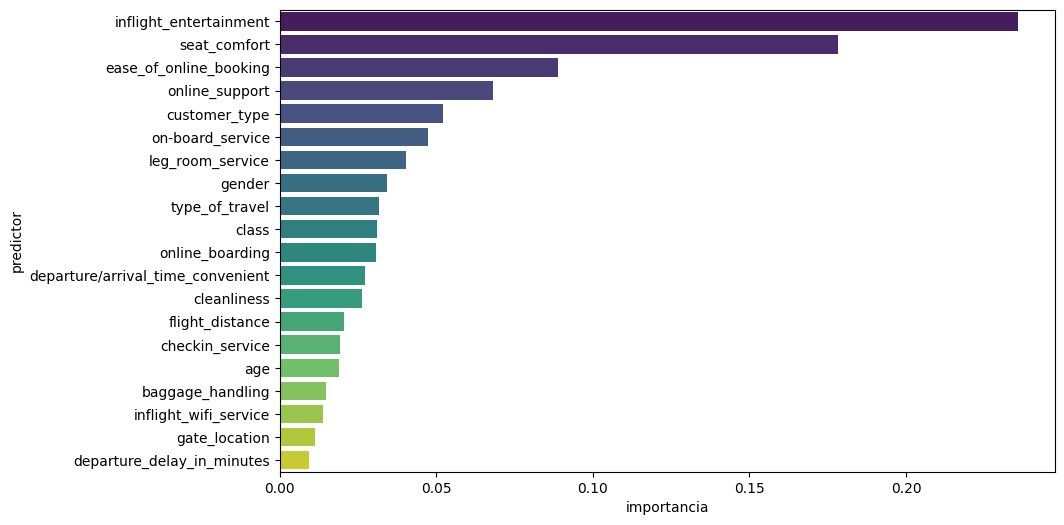

In [15]:

plt.figure(figsize=(10,6))
sns.barplot(x = "importancia", y = "predictor", data = importancia_predictores, palette="viridis");
plt.show()